<a href="https://colab.research.google.com/github/gabitopop/EDA_FundamentosML_GabrielValderas/blob/main/Prueba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero voy a importar las librerias necesarias para poder realizar la evaluación.

In [2]:
import numpy as np   # Programación vectorial
import matplotlib.pyplot as plt   # Visualización
import pandas as pd   # Estructura y manipulación de datos

Ahora voy a importar el dataset desde el disco duro que descargue desde kaggle.

In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
data = pd.read_csv(name, sep=",", encoding='latin-1')

Saving data.csv to data (3).csv


EDA

Con estos prints se pueden observar los datos del dataset


In [5]:
print(data.head())

print(data.info())

print(data.describe())

print(data.shape)

data.columns


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Hice un gráfico de barras donde se pueda ver la nacionalidad de los Customers

Calculo de Medida central.


In [26]:
numerical_columns = data.select_dtypes(include=np.number).columns

for col in numerical_columns:
    if data[col].notna().any():
        mean = data[col].mean()
        median = data[col].median()
        mode = data[col].mode().iloc[0] if not data[col].mode().empty else "No mode"

        print(f"Column: {col}")
        print(f"  Mean: {mean}")
        print(f"  Median: {median}")
        print(f"  Mode: {mode}\n")
    else:
        print(f"Column '{col}' contains only missing values, so no measures of central tendency could be calculated")


Column: Quantity
  Mean: 9.55224954743324
  Median: 3.0
  Mode: 1

Column: UnitPrice
  Mean: 4.611113626088513
  Median: 2.08
  Mode: 1.25

Column: CustomerID
  Mean: 15287.690570239585
  Median: 15152.0
  Mode: 17841.0



Calculo de medida de dispersión.

In [29]:
numerical_columns = data.select_dtypes(include=np.number).columns

for col in numerical_columns:
    if data[col].notna().any():
        range_val = data[col].max() - data[col].min()
        variance = data[col].var()
        std_dev = data[col].std()

        print(f"Column: {col}")
        print(f"  Range: {range_val}")
        print(f"  Variance: {variance}")
        print(f"  Standard Deviation: {std_dev}\n")
    else:
        print(f"Column '{col}' contains only missing values, so no measures of dispersion could be calculated")


Column: Quantity
  Range: 161990
  Variance: 47559.39140913822
  Standard Deviation: 218.08115784986612

Column: UnitPrice
  Range: 50032.06
  Variance: 9362.469164424467
  Standard Deviation: 96.75985306119716

Column: CustomerID
  Range: 5941.0
  Variance: 2936425.999544096
  Standard Deviation: 1713.6003033216632



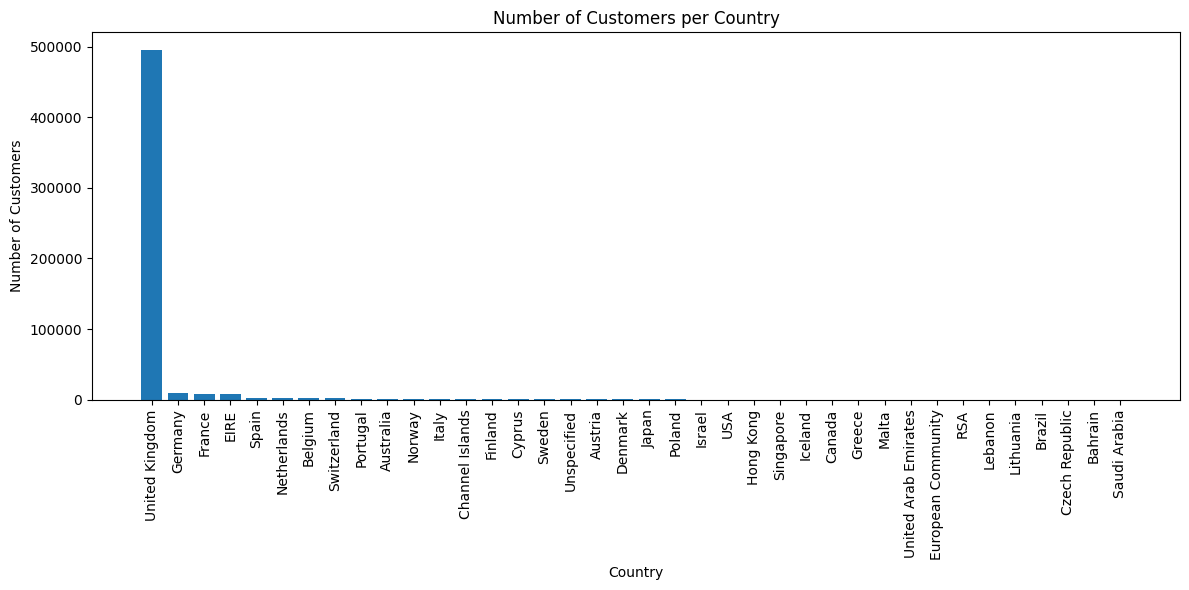

In [10]:
#Se crea una variable que use los datos del dataset y poder contar a los customers y sus respectivos paises.
customer_counts = data['Country'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(customer_counts.index, customer_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Con este código se puede observar cuantos Customers hay en cada país

In [14]:
top_5_countries = customer_counts.head(5)
print(top_5_countries)

for country in top_5_countries.index:
    customers_in_country = data[data['Country'] == country]
    customer_ids = customers_in_country['CustomerID'].unique()
    print(f"\nCustomers IDs en {country}:")
    print(customer_ids)
    print(f"Número de Clientes en {country}: {len(customer_ids)}")


Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

Customers IDs en United Kingdom:
[17850. 13047. 13748. ... 15520. 13298. 14569.]
Número de Clientes en United Kingdom: 3951

Customers IDs en Germany:
[12662. 12472. 12471. 12738. 12427. 12600. 12712. 12647. 12720. 12708.
 12474. 12709. 12481. 12621. 12649. 12605. 12476. 12705. 12668. 13817.
 12585. 12530. 12501. 12480. 12500. 12524. 12601. 12665. 12626. 12673.
 12527. 12559. 12693. 12625. 13815. 12609. 12645. 12468. 12528. 12477.
 12561. 12654. 12633. 12614. 12623. 12520. 12613. 12619. 12569. 12580.
 12701. 13811. 12622. 12592. 12590. 12710. 12426. 12473. 12517. 12516.
 12635. 12648. 12560. 12521. 12627. 13814. 13813. 12534. 12644. 12518.
 12642. 13812. 12492. 14335. 12526. 12566. 12497. 12612. 12703. 12628.
 13816. 12519. 12498. 13810. 12475. 12572. 12522. 12581. 12504. 12603.
 12702. 12658. 12531. 12479. 12713.]
Número de Cli

Se puede observar en el gráfico que los 5 paises con más Customers son: United Kingdom, Germany, France, EIRE, Spain.
EIRE es Irlanda.
Al separar a los 5 paises con más Customers se obserba la gran diferencia entre los puestos y el más claro es United Kingdom con Germany.

Con este código se puede obtener la descripción del producto más vendido

In [22]:
product_counts = data.groupby('Description')['InvoiceNo'].count().sort_values(ascending=False)

most_sold_product = product_counts.index[0]

print(f"La descripción del producto más vendido: {most_sold_product}")


La descripción del producto más vendido: WHITE HANGING HEART T-LIGHT HOLDER


Gráfico de dispersión sobre la unidad de precio y cantidad.


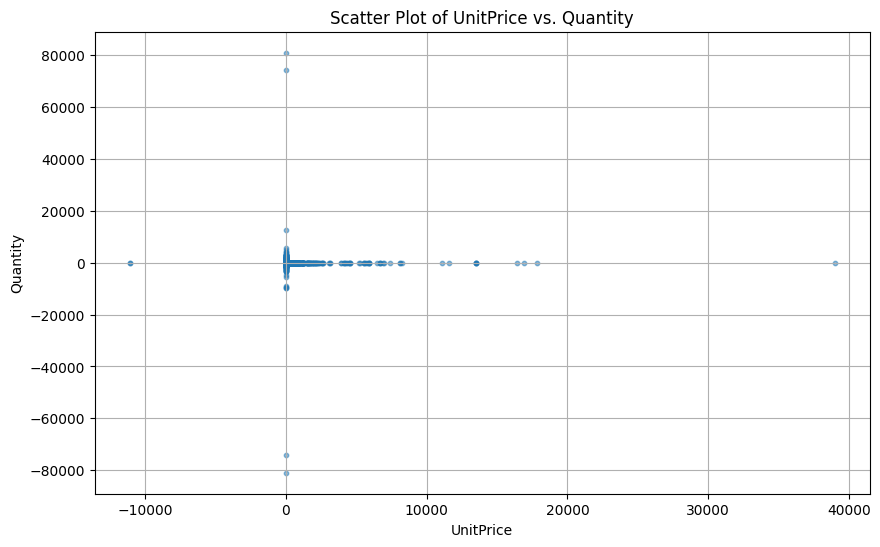

In [4]:
numerical_cols = ['UnitPrice', 'Quantity']

plt.figure(figsize=(10, 6))
plt.scatter(data[numerical_cols[0]], data[numerical_cols[1]], alpha=0.5, s=10)
plt.ylabel(numerical_cols[1])
plt.title(f'Scatter Plot of {numerical_cols[0]} vs. {numerical_cols[1]}')
plt.grid(True)
plt.show()


Lo que se Observa en el Dataset es que aunque la empresea sea de United Kingdom igual tienen clientes de otros paises.
Tambien el Customer que más se repite es la ID: 17841.
Se puede observar que hay productos que tienen Cantidades Negativas.